In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm, trange

In [7]:
sensor_df = pd.read_csv('dataset/tgr_sensor.csv')
sensor_df['day'] = sensor_df.apply(
    lambda row: pd.Timestamp(row['timestamp']).dayofyear, axis=1)
sensor_df['timestamp'] = pd.to_datetime(sensor_df['timestamp'])

In [8]:
sensor_df.head()

,Unnamed: 0,DevEUI,lat,lng,row_id,sensor,team_id,timestamp,day
0,0,AA00DBCA14EF1406,13.726994,100.776382,-LvR7oWWZXJe6VOdRGRO,7,2,2019-12-06 23:55:28,340
1,1,AA00DBCA14EF1406,13.726994,100.776382,-LvR7qqNFIqztahrhJi1,9,2,2019-12-06 23:55:38,340
2,2,AA00DBCA14EF1406,13.726994,100.776382,-LvR7tH_9AP1fx-KFJBI,6,2,2019-12-06 23:55:48,340
3,3,AA00DBCA14EF1406,13.726994,100.776382,-LvR7viVhF2tdJyfjlWE,6,2,2019-12-06 23:55:58,340
4,4,AA00DBCA14EF1406,13.726994,100.776382,-LvR7y9ZK5j_fwWrjwnb,5,2,2019-12-06 23:56:08,340


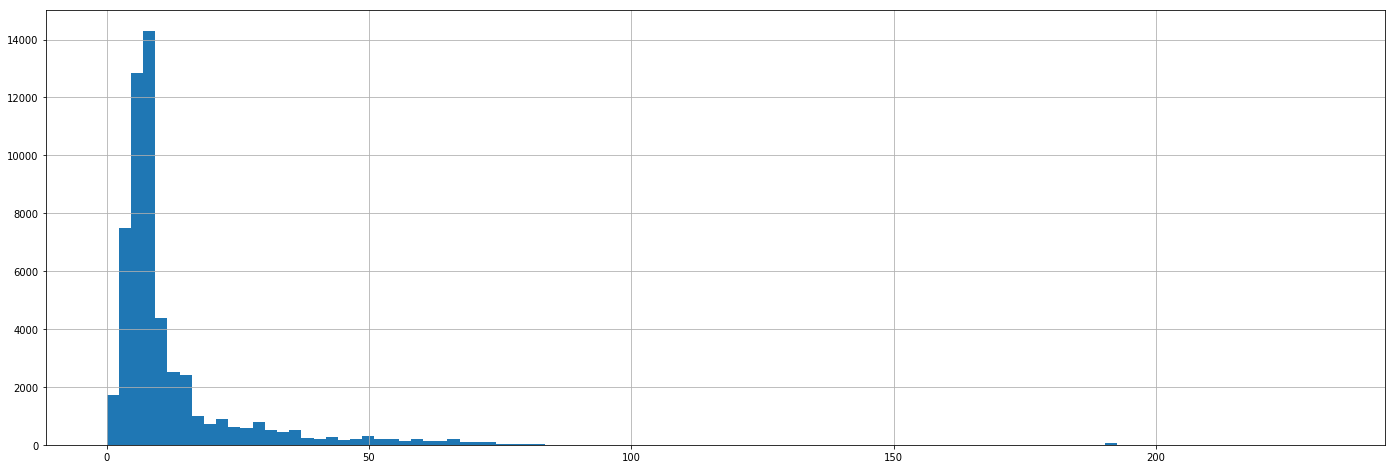

In [9]:
sensor_df['sensor'].hist(figsize=(24,8), bins=100)

In [10]:
sensor_df['sensor'].describe()

count    54776.000000
mean        11.922831
std         14.026130
min          0.000000
25%          5.000000
50%          7.000000
75%         12.000000
max        232.000000
Name: sensor, dtype: float64

# Count day

In [7]:
count_day = sensor_df.groupby(['DevEUI']).apply(lambda row: row['day'].drop_duplicates().count())

In [8]:
count_day

DevEUI
AA00DBCA14EF1403     1
AA00DBCA14EF1406    15
AA00DBCA14EF1407     4
AA00DBCA14EF1420     5
AA00DBCA14EF1421     3
AA00DBCA14EF1426    10
AA00DBCA14EF1432     4
AA00DBCA14EF1433     6
dtype: int64

In [9]:
sensor_df[['team_id','DevEUI']].sort_values('DevEUI').drop_duplicates()

,team_id,DevEUI
45814,3,AA00DBCA14EF1403
0,2,AA00DBCA14EF1406
45832,6,AA00DBCA14EF1406
46886,7,AA00DBCA14EF1407
50922,32,AA00DBCA14EF1420
47027,30,AA00DBCA14EF1421
46896,21,AA00DBCA14EF1421
46938,26,AA00DBCA14EF1426
45674,3,AA00DBCA14EF1426
51503,32,AA00DBCA14EF1432


# Trend

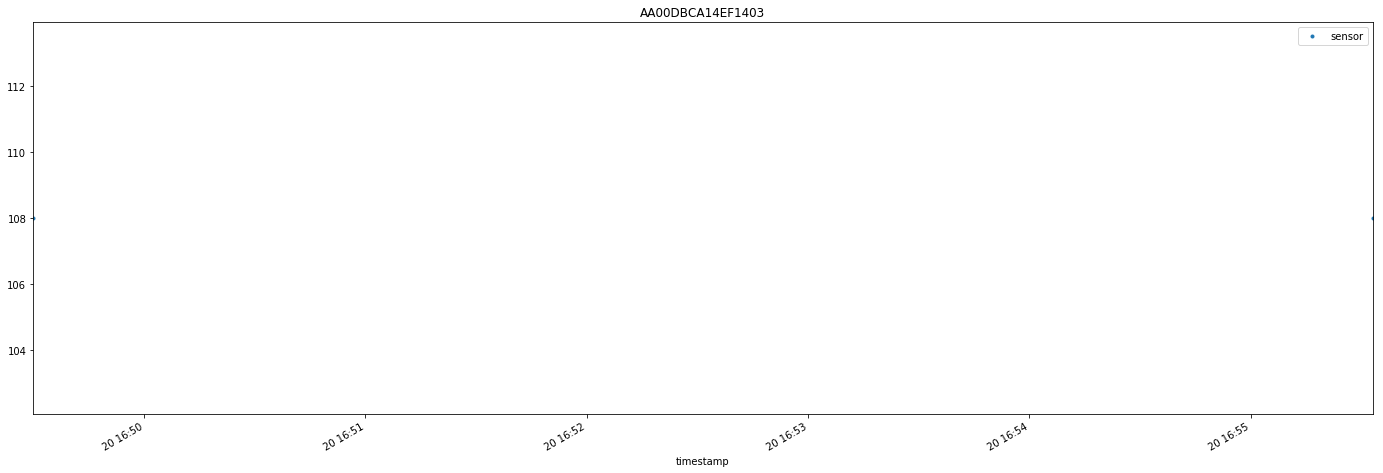

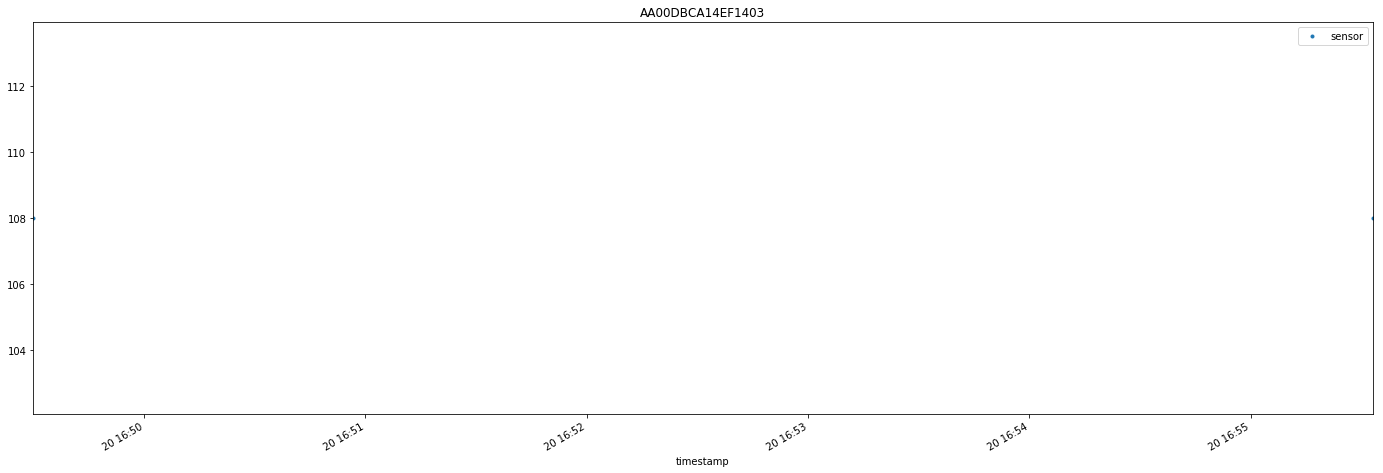

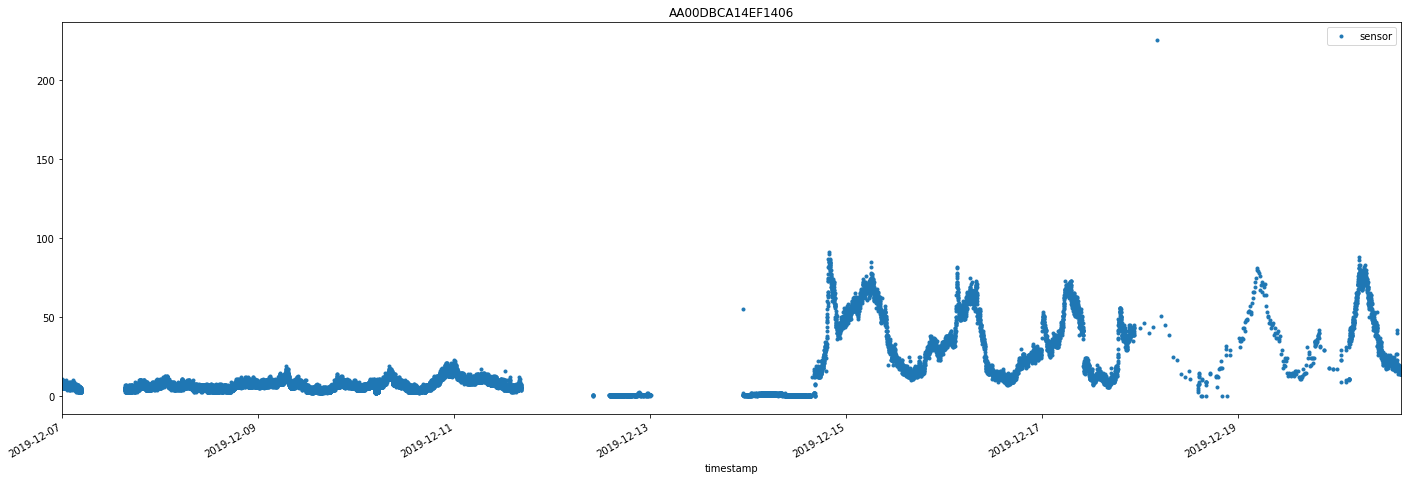

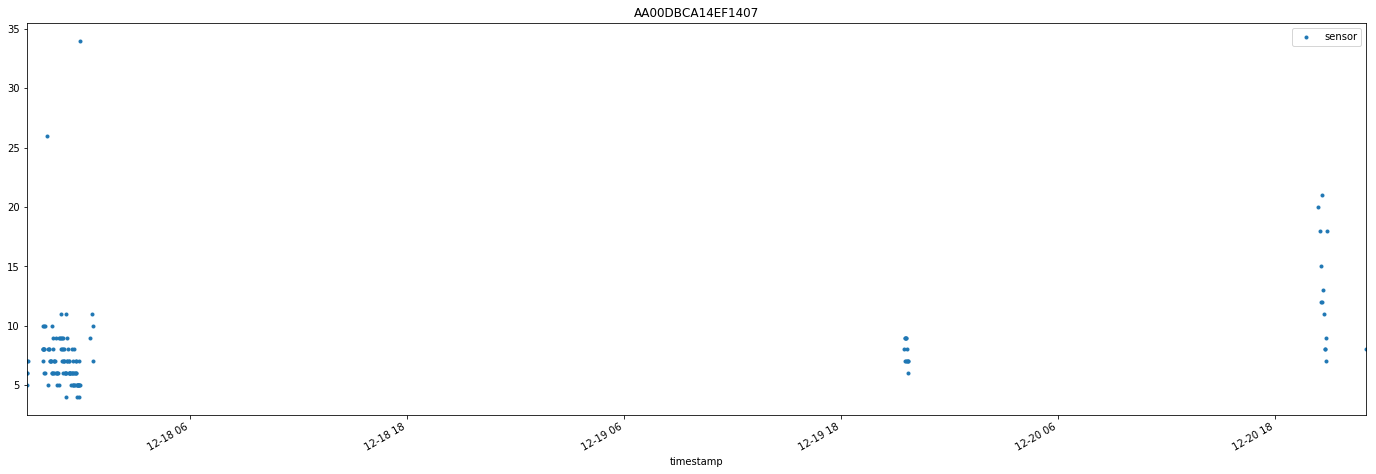

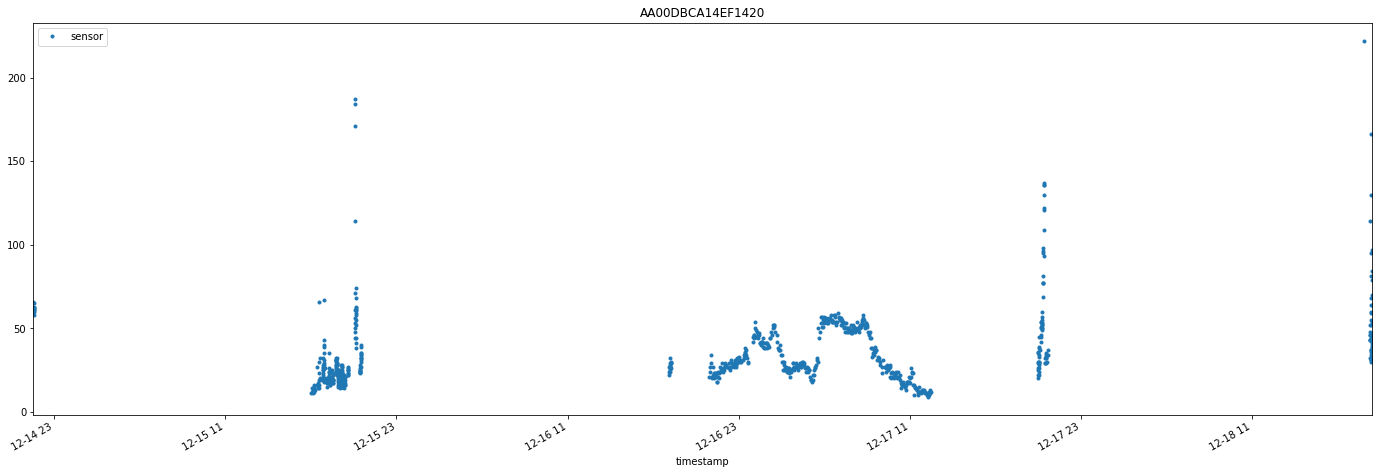

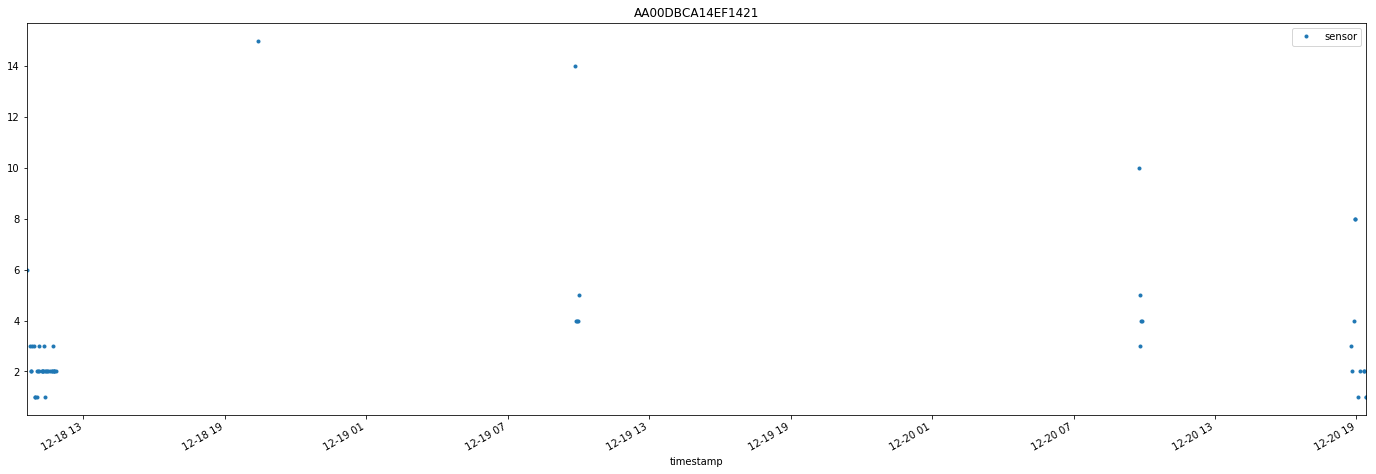

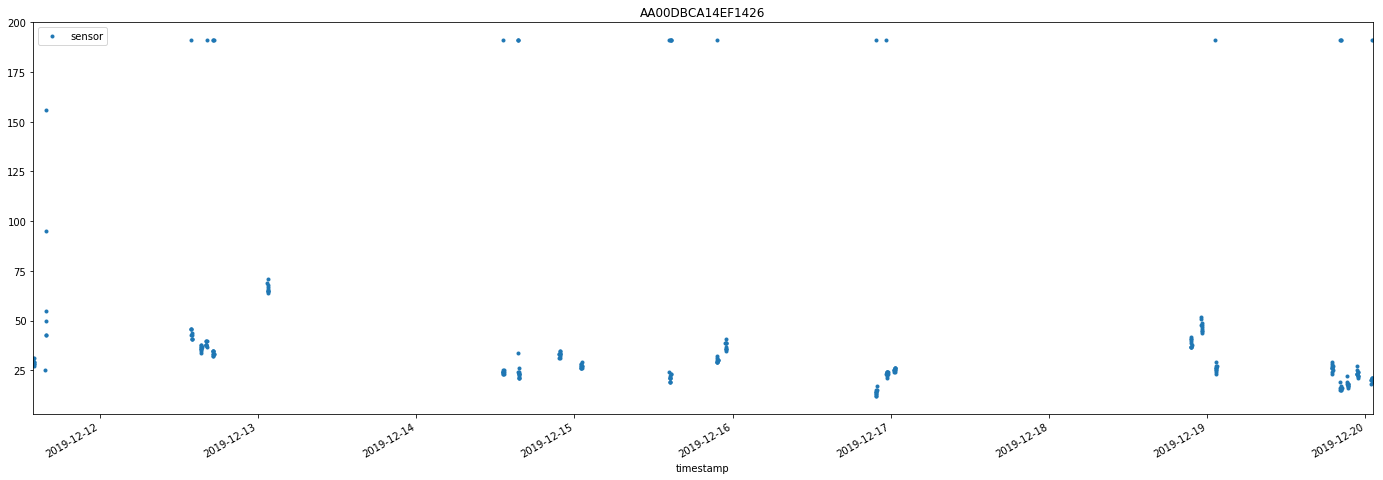

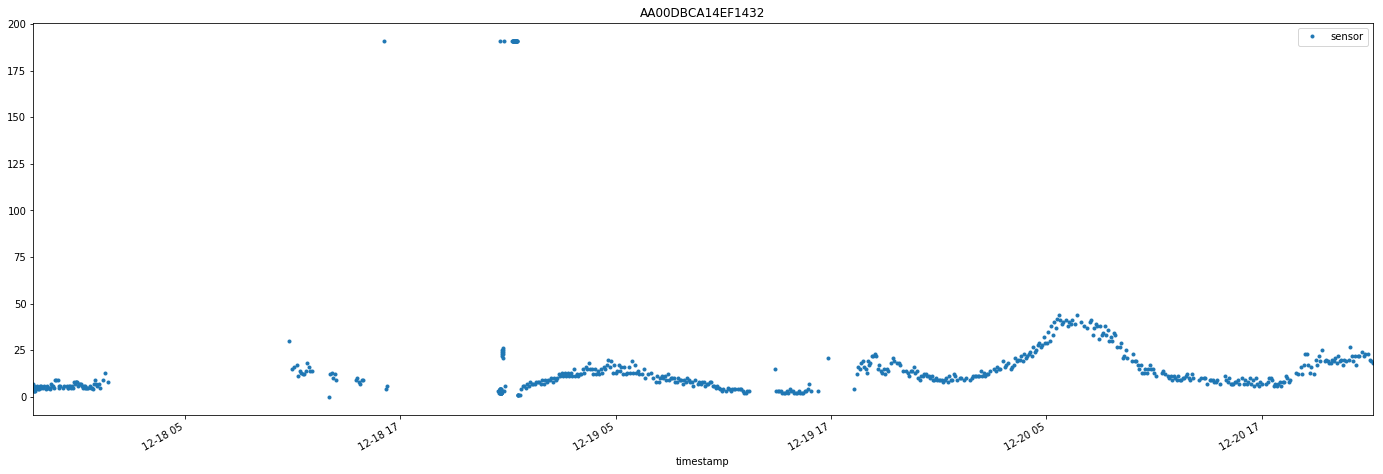

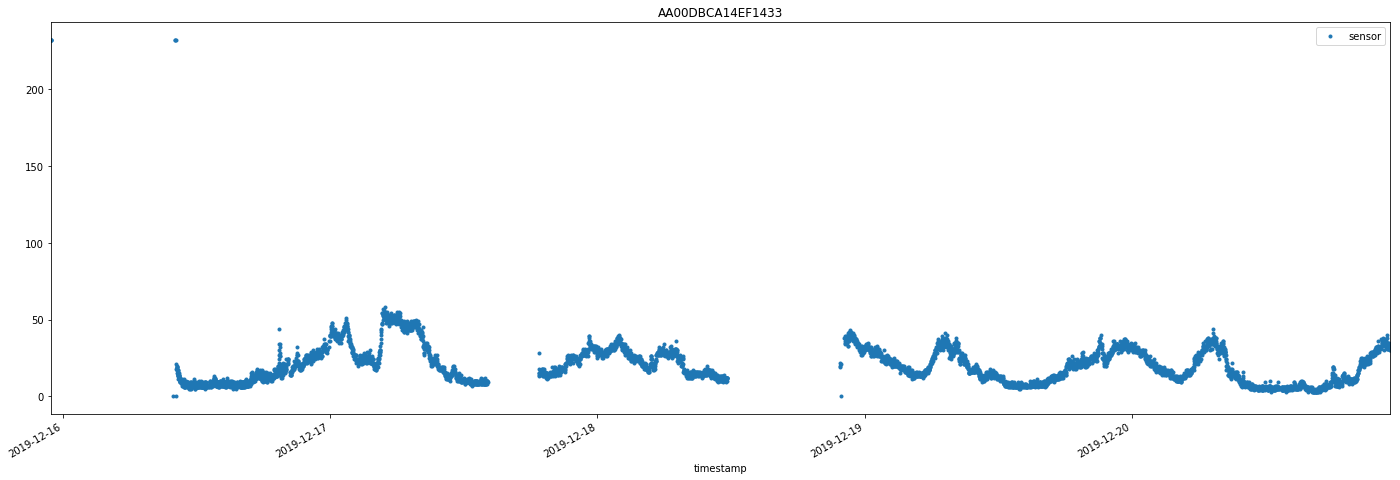

In [39]:
device_sensor = sensor_df.groupby('DevEUI').apply(
    lambda device: device.sort_values('timestamp')[['timestamp', 'sensor']]
    .plot(x='timestamp', y='sensor', style='.', title=device.name, figsize=(24, 8)))